# Theta90 Plotting

## IMPORT MODULES

In [1]:
## MAKE MATPLOTLIB INLINE
%matplotlib inline

## IMPORT OS
import os

## IMPORT NUMPY
import numpy as np  # Used to do math functions

## FUNCTION TO SAVE AND LOAD PICKLE FILES
from sam_analysis.core.pickles import load_pkl

## IMPORT PLOTTING TOOLS
from sam_analysis.plotting.plots import plot_line

## SET PATHS AND LOAD DATA

In [2]:
## WORKING DIRECTORY
project_dir = r"/home/bdallin/python_projects/sam_analysis/sam_analysis"
data_dir    = "raw_data"

## DATA FILE
data_pkl = r"unbiased_data.pkl"

## FIGURE PATHS
manuscript_dir = r"/mnt/c/Users/bdallin/Box Sync/univ_of_wisc/manuscripts/chemically_heterogeneous_sams"
figure_dir     = r"figures"

## LOAD DATA
path_data_pkl = os.path.join( project_dir, data_dir, data_pkl )
raw_data      = load_pkl( path_data_pkl )

LOADING PKL FILE...
LOADED PKL FROM /home/bdallin/python_projects/sam_analysis/sam_analysis/raw_data/unbiased_data.pkl



## COMPILE DATA TO PLOT

In [3]:
## SAMS
sam_labels = [   
#                ## SINGLE COMPONENTS 
#                "CH3", "NH2", "CONH2", "OH",
#                ## NH2 MIXED COMPOSITION
#                "MIX25NH2", "MIX40NH2", "MIX50NH2", "MIX75NH2",
#                ## CONH2 MIXED COMPOSITION
               "MIX75CONH2", #"MIX40CONH2", "MIX50CONH2", "MIX75CONH2",
#                # OH MIXED COMPOSITION
#                "MIX25OH", "MIX40OH", "MIX50OH", "MIX75OH",
#                ## NH2 SEPARATED COMPOSITION
#                "SEP25NH2", "SEP40NH2", "SEP50NH2", "SEP75NH2",
               ## CONH2 SEPARATED COMPOSITION
               "SEP75CONH2", #"SEP40CONH2", "SEP50CONH2", "SEP75CONH2",
#                # OH SEPARATED COMPOSITION
#                "SEP25OH", "SEP40OH", "SEP50OH", "SEP75OH",
                ]

## ANALYSIS TYPES
"""
X LABEL:
"theta90_x"

Y LABEL:
"theta90_dist"
"""

## X,Y DATA LABELS
x_label    = [ "theta90_x", ]
y_label    = [ "theta90_dist", ]

## CREATE PLACEHOLDERS
labels = []
x      = []
xerr   = []
y      = []
yerr   = []

## LOOP THROUGH SAMS
for ii in range(len(x_label)):
    for ll in sam_labels:
        x_data = raw_data[ll][x_label[ii]]
        y_data = raw_data[ll][y_label[ii]]

        ## COMPUTE STATISTICS        
#         xx    = x_data.mean( axis = 0 )
        xx    = x_data[1,:]
#         xxerr = x_data.std( axis = 0 )
        xxerr = np.zeros_like( xx )
#         yy    = y_data.mean( axis = 0 )
        yy    = y_data[1,:]
#         yyerr = y_data.std( axis = 0 )
        yyerr = np.zeros_like( yy )

        ## APPEND RESULTS
        labels.append( ll )
        x.append( xx )
        xerr.append( xxerr )
        y.append( yy )
        yerr.append( yyerr )

## NORMALIZE
y_data = raw_data["CH3"][y_label[0]]
cc  = (y_data[0,:] / y_data[0,:].sum()).mean()
const = np.array([ yy.sum() * cc for yy in y ])

# y = [ (yy / yy.sum()) - const for yy in y ]
y    = [ y[ii] / const[ii] for ii in range(len(y)) ]
yerr = [ yyerr[ii] / const[ii] for ii in range(len(yerr)) ]


--- CREATING LINE PLOT ---
FIGURE SAVED TO: /mnt/c/Users/bdallin/Box Sync/univ_of_wisc/manuscripts/chemically_heterogeneous_sams/figures/theta90_x_position_dist_sep_conh2


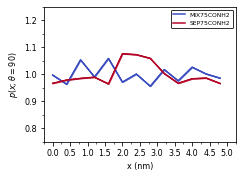

In [4]:
## FIGURE FILE
fig_name = r"theta90_x_position_dist_sep_conh2"
## FIGURE OUT PATH
fig_path = os.path.join( manuscript_dir,
                         figure_dir,
                         fig_name )
# fig_path = None

## IMPORT MATPLOTLIB
from matplotlib import cm

## CUSTOMIZE COLORBAR 
colors = [ cm.coolwarm(ii) for ii in np.linspace( 0.0, 1.0, len(y) ) ]

## PLOT LINE
plot_line( x, y,
           yerr        = yerr,
           xlabel      = r"x (nm)",
           ylabel      = r"$p(x; \theta=90)$",
           xticks      = [ 0, 5.0, 0.5 ],
           yticks      = [ 0.8, 1.2, 0.1 ],
           colors      = colors,
           line_labels = labels,
           legend_cols = 1,
           fig_path    = fig_path, )


In [5]:
[ yy.max() for yy in y ]

[1.0589394839585808, 1.076434687729286]

In [6]:
labels

['MIX75CONH2', 'SEP75CONH2']